In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))
    return rmse

In [3]:
def r2(y, ypred):
    SS_resid = sum((y - ypred)**2)
    SS_tot = sum((y - np.mean(y))**2)
    R2 = 1- (SS_resid / SS_tot)
    return R2

# K32 - Phân tích dữ liệu thông minh

## Bài tập cá nhân 1

Họ tên học viên: Lê Nhựt Nam

MSHV: 22C11067

## Đề bài

Có số liệu thống kê về *lãi suất ngân hàng* ($X, \%$ năm) và *tổng vốn đầu tư* ($Y$, tỉ đồng) trên địa bàn tỉnh A qua 10 năm liên tiếp như sau:

| Năm  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|---|---|---|---|---|---|---|---|---|---|---|
| $X$  | 7.0  | 6.5  | 6.5  | 6.0  | 6.0  | 6.0  | 5.5  | 5.5  | 5.0  | 4.5  |
| $Y$  | 29  | 32  | 31  | 34  | 32  | 35  | 40  | 43  | 48  | 50  |

1. Hãy lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? Nêu ý nghĩa của các hệ số hồi quy ước lượng được? Đánh giá mức độ phù hợp của mô hình?
2. Kiểm định giả thiết "Hệ số hồi quy của X trong hàm hồi quy tổng thể bằng 0 với mức ý
nghĩa 2%" và nêu ý nghĩa của kết quả?
3. Dự báo tổng vốn đầu tư trung bình khi lãi suất là 4.8% năm với độ tin cậy 98%?

In [4]:
# Chuẩn bị dữ liệu
X_origin = np.array([7.0, 6.5, 6.5, 6.0, 6.0, 6.0, 5.5, 5.5, 5.0, 4.5])
y_origin = np.array([29, 32, 31, 34, 32, 35, 40, 43, 48, 50])
X = X_origin.reshape(-1,1) # 5x1 vector, N=5, D=1
y = y_origin.reshape(-1,1) # 5x1 vector

Text(0, 0.5, '$y$')

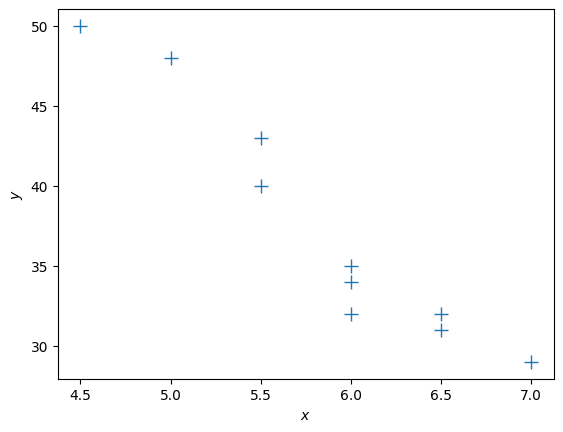

In [5]:
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")

### Hãy lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? Nêu ý nghĩa của các hệ số hồi quy ước lượng được? Đánh giá mức độ phù hợp của mô hình?

*Lời giải*

Dựa trên hình ảnh trực quan hóa, ta có thể sử dụng mô hình hồi để quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng. Xem xét dạng của bài toán hồi quy tuyến tính như sau:

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
trong đó $\boldsymbol x\in\mathbb{R}^D$ là biến phụ thuộc (đầu vào) và $y\in\mathbb{R}$ là các quan sát bị nhiễu. Vector tham số $\boldsymbol\theta\in\mathbb{R}^D$ tham số hóa hàm tuyến tính này.

Giả sử có tập huấn luyện $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. Ta hình thức hóa các bộ dữ liệu đầu vào huấn luyện theo thứ tự $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ và các mục tiêu huấn luyện tương ứng $\mathcal Y = \{y_1, \ldots, y_N\}$.

**Triển vọng cực đại**

Phương pháp ước tính triển vọng cực đại của các tham số $\boldsymbol\theta$. Trong ước tính triển vọng cực đại, các tham số $\boldsymbol\theta^{\mathrm{ML}}$ cực đại hóa likelihood

$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$

Giải bài toán tối ưu, nghiệm thu được là:

$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
trong đó:
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [6]:
def max_lik_estimate(X, y):
    """
        X: N x D ma trận dữ liệu huấn luyện đầu vào
        y: N x 1 vector của mục tiêu huấn luyện/ quan sát huấn luyện
        trả về: tham số triển vọng cực đại (D x 1)
    """
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    # theta_ml = np.linalg.pinv(X) @ y
    
    return theta_ml

In [7]:
def predict_with_estimate(Xtest, theta):
    """
        Xtest: K x D ma trận dữ liệu kiểm tra
        theta: D x 1 vector tham số
        trả về: kết quả dự đoán f(Xtest); K x 1 vector
    """
    prediction = Xtest @ theta
    
    return prediction 

Text(0, 0.5, '$y$')

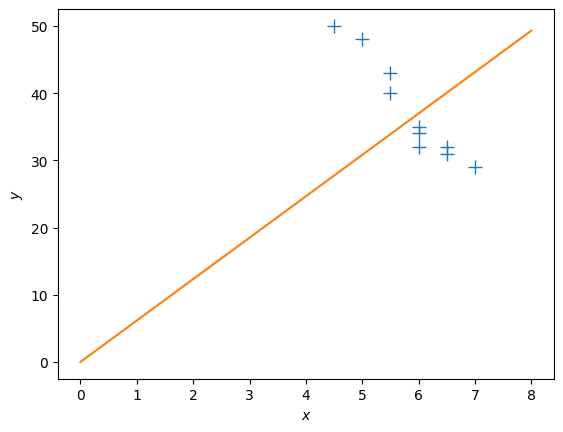

In [8]:
# Tính toán ước lượng triển vọng cực đại
theta_ml = max_lik_estimate(X,y)

Xtest = np.linspace(0,8,40).reshape(-1,1)

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# Trực quan
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [9]:
# Đánh giá RMSE
RMSE(y, X @ theta_ml)

11.38335212244427

In [10]:
# Đánh giá R2
r2(y, X @ theta_ml)

array([-1.61040906])

Nhận xét:
- Đường hồi quy không tốt

Cách giải quyết: thêm một bias vào mô hình để nó linh hoạt hơn.

$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$

Định nghĩa:

$$\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$$

Ta viết lại phương trình mô hình hồi quy tuyến tính:

$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

Text(0, 0.5, '$y$')

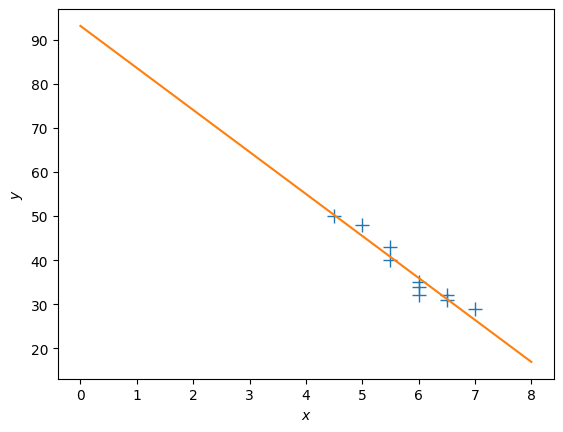

In [11]:
X_aug = np.hstack([np.ones((len(X),1)), X])

# Tính toán ước lượng triển vọng cực đại
theta_ml = max_lik_estimate(X_aug, y)

Xtest = np.linspace(0,8,40).reshape(-1,1)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
ml_prediction = predict_with_estimate(Xtest_aug, theta_ml)

# Trực quan
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [12]:
# Đánh giá RMSE
RMSE(y, X_aug @ theta_ml)

1.995018672215266

In [13]:
# Đánh giá R2
r2(y, X_aug @ theta_ml)

array([0.91982072])

Nhận xét:
- Mô hình cải thiện RMSE thấp hơn so với phiên bản trước.
- Các hệ số của mô hình: hệ số góc $\theta_0$ và hệ số bias $\theta_1$ tạo thành vector tham số của mô hình

**Phi tuyến hóa hồi quy tuyến tính**

Ta hoàn toàn có thể khớp các hàm phi tuyến tính trong đầu vào $\boldsymbol x$, miễn là các tham số $\boldsymbol\theta$ xuất hiện tuyến tính. Điều này có nghĩa là, chúng ta có thể học các hàm có dạng:

$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
trong đó các đặc trưng $\phi_k(\boldsymbol x)$ là các phép biến đổi (có thể phi tuyến tính) của các đầu vào $\boldsymbol x$.

Một trong những loại hàm thường hay sử dụng đó là hàm đa thức bậc $K$, ta viết

$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Ở đây, $\boldsymbol\phi(x)$ là phép biến đổi đặc trưng phi tuyến tính của các đầu vào $x\in\mathbb{R}$.

Từ đó, tập huấn luyện sau khi biến đổi có dạng:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

In [14]:
def poly_features(X, K):
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    
    #initialize Phi
    Phi = np.zeros((X.shape[0], K+1))
    
    # Compute the feature matrix in stages
    for k in range(K+1):
        Phi[:,k] = X**k ## <-- SOLUTION
    return Phi

Nghiệm tối ưu

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

Nghiệm tối ưu (+tối ưu tính toán số học)

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [15]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    # maximum likelihood estimate
    theta_ml = np.linalg.inv(Phi.T @ Phi + kappa*np.eye(Phi.shape[1])) @ Phi.T @ y
    
    return theta_ml

Text(0, 0.5, '$y$')

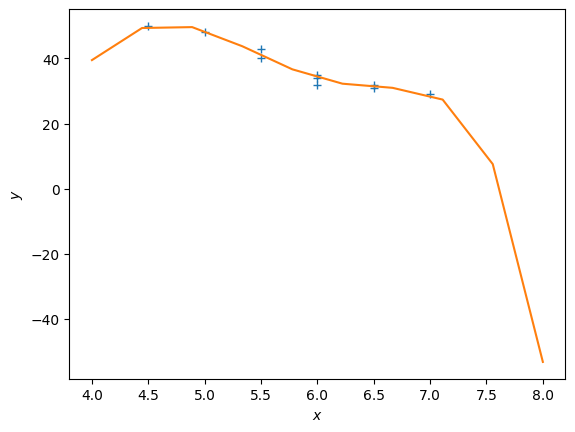

In [16]:
K = 5 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X, K) # N x (K+1) feature matrix

poly_theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(4,8,10).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ poly_theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [17]:
# Đánh giá RMSE
RMSE(y, poly_features(X, K) @ poly_theta_ml)

1.0451327441775917

**Giải thích hệ số của mô hình hồi quy tuyến tính**

In [18]:
beta_0, beta_1 = theta_ml[0], theta_ml[1]
beta_0, beta_1

(array([93.1641791]), array([-9.53233831]))

Hệ số ```beta_1``` trong mô hình hồi quy thể hiện thay đổi trong *lãi suất ngân hàng* cho một đơn vị thay đổi trong *tổng vốn đầu tư*. Hệ số ```beta_0``` là dự đoán *tổng vốn đầu tư* nếu *lãi suất ngân hàng* bằng 0

In [19]:
from scipy.stats import pearsonr


covariance = beta_1 * np.var(X_origin) 
cor = covariance / (np.std(X_origin) * np.std(y_origin))
print(cor)
print(pearsonr(X_origin, y_origin)[0])

[-0.95907284]
-0.9590728434941582


### Kiểm định giả thiết "Hệ số hồi quy của X trong hàm hồi quy tổng thể bằng 0 với mức ý nghĩa 2%" và nêu ý nghĩa của kết quả?

In [75]:
import statsmodels.api as sm
results = sm.OLS(y, X_aug).fit()
r = np.zeros_like(results.params)

In [76]:
results.summary()

/home/lnhutnam/anaconda3/envs/yolo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.78
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.17e-05
Time:                        11:25:41   Log-Likelihood:                -21.096
No. Observations:                  10   AIC:                             46.19
Df Residuals:                       8   BIC:                             46.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1642      5.863     15.889      0.000      79.643     106.685
x1            -9.5323      0.995     -9.580      0.000     -11.827      -7.238
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.366
Skew:                          -0.341   Prob(JB):                        0.833
Kurtosis:                       2.357   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
results.params

array([93.1641791 , -9.53233831])

In [87]:
# Check the p-value of the coefficient for X
p_value = results.pvalues[1]

# Set the significance level
alpha = 0.02

# Compare the p-value with the significance level
if p_value > alpha:
    print("The regression coefficient of X is not statistically significant.")
else:
    print("The regression coefficient of X is statistically significant.")

The regression coefficient of X is statistically significant.


### Dự báo tổng vốn đầu tư trung bình khi lãi suất là 4.8% năm với độ tin cậy 98%?

In [100]:
pred = results.get_prediction([1, 4.8])

In [101]:
# Extract the predicted values and confidence intervals
predicted_values = pred.predicted_mean
confidence_intervals = pred.conf_int(alpha=0.02)  # 98% confidence interval

In [102]:
print("Predicted value:", predicted_values)
print("Confidence interval:", confidence_intervals)

Predicted value: [47.40895522]
Confidence interval: [[43.7577276  51.06018285]]
